In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [119]:
df = pd.read_csv(r"C:\Users\areeb\Downloads\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", encoding = 'utf-8', encoding_errors = 'replace')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.shape

(11251, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [17]:
# drop blank columns
df.drop(["Status","unnamed1"], axis = 1 , inplace = True)

In [19]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
# drop null values
df.dropna(inplace = True)

In [21]:
# changing dtype float into whole no
df["Amount"] = df["Amount"].astype("int")

In [24]:
df["Amount"].dtype

dtype('int32')

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [30]:
# renaming column
df.rename(columns = {'Marital_Status': "Shaadi"}, inplace = True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [32]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [35]:
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EDA

## Gender

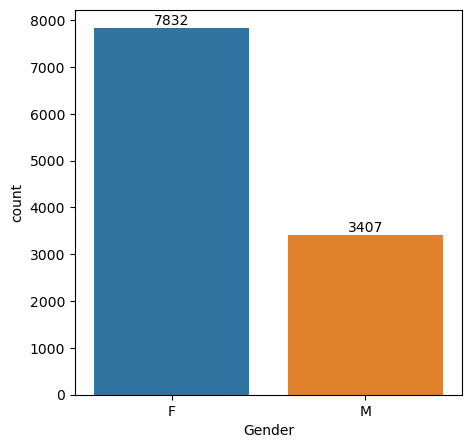

In [48]:
plt.figure(figsize = (5,5))

ax = sns.countplot( x = "Gender", data = df )

for bars in ax.containers:
    ax.bar_label(bars)

In [80]:
df.groupby(["Gender"], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


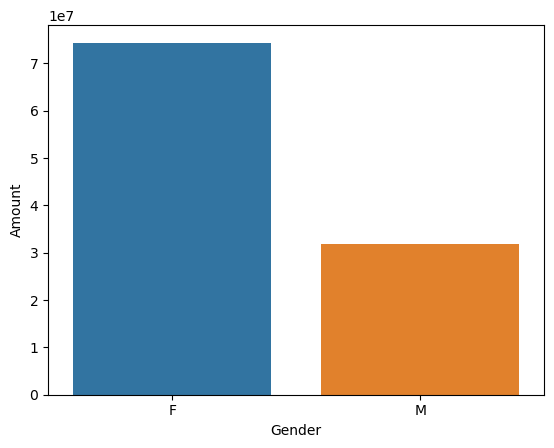

In [84]:
sales_gen = df.groupby(["Gender"], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot( x = "Gender", y = "Amount" ,  data = sales_gen)

plt.show()

## Age

In [164]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

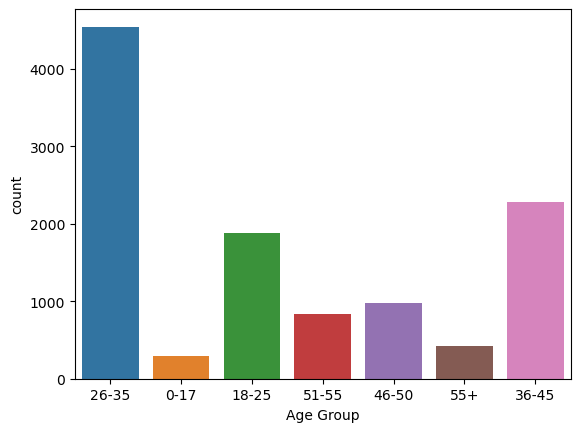

In [95]:
sns.countplot(data = df, x = "Age Group")

plt.show()

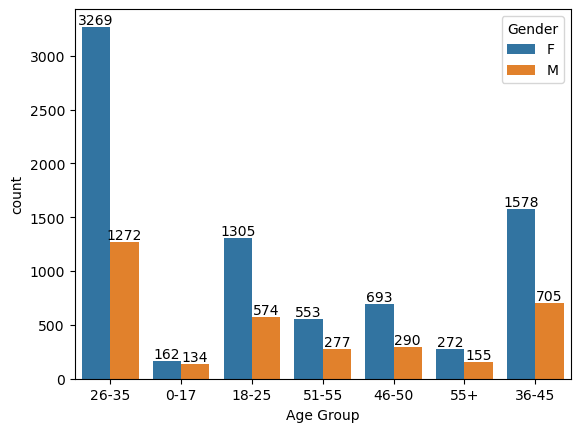

In [94]:
ax = sns.countplot(data = df, x = "Age Group", hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

# State

In [105]:
sales_state = df.groupby(df["State"], as_index = False)["Orders"].sum().sort_values(by = 'Orders', ascending = False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra�Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


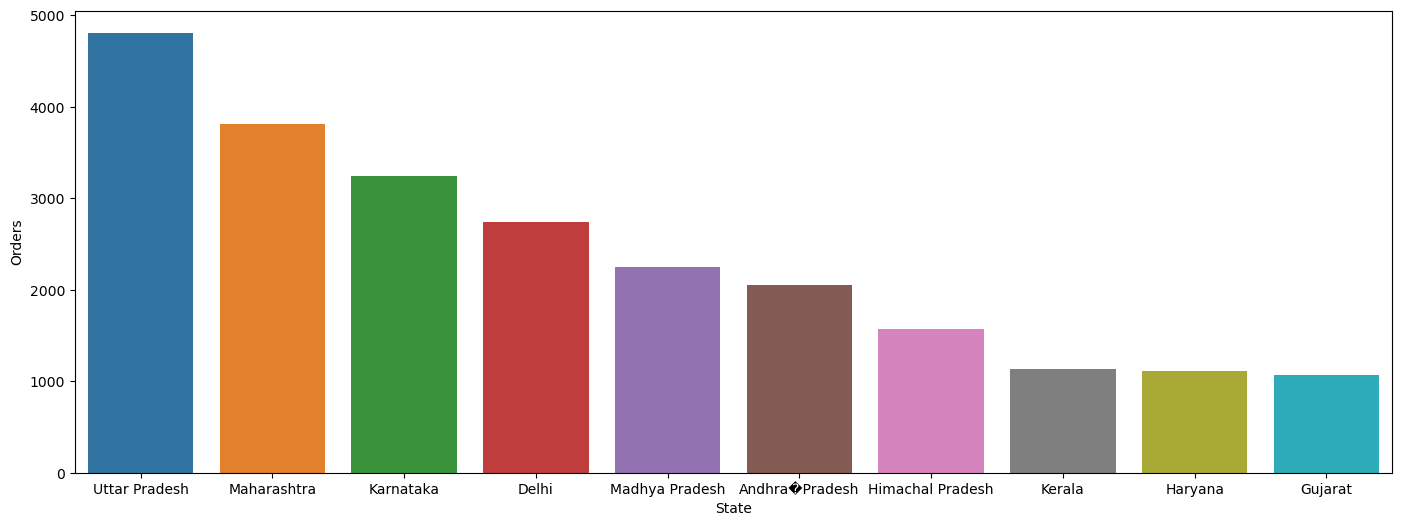

In [113]:
plt.figure(figsize = (17,6))

sns.barplot( data = sales_state , x = 'State', y = "Orders")

plt.show()

In [115]:
# total amount / sales from top 10 states

sales_state = df.groupby(df["State"], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra�Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


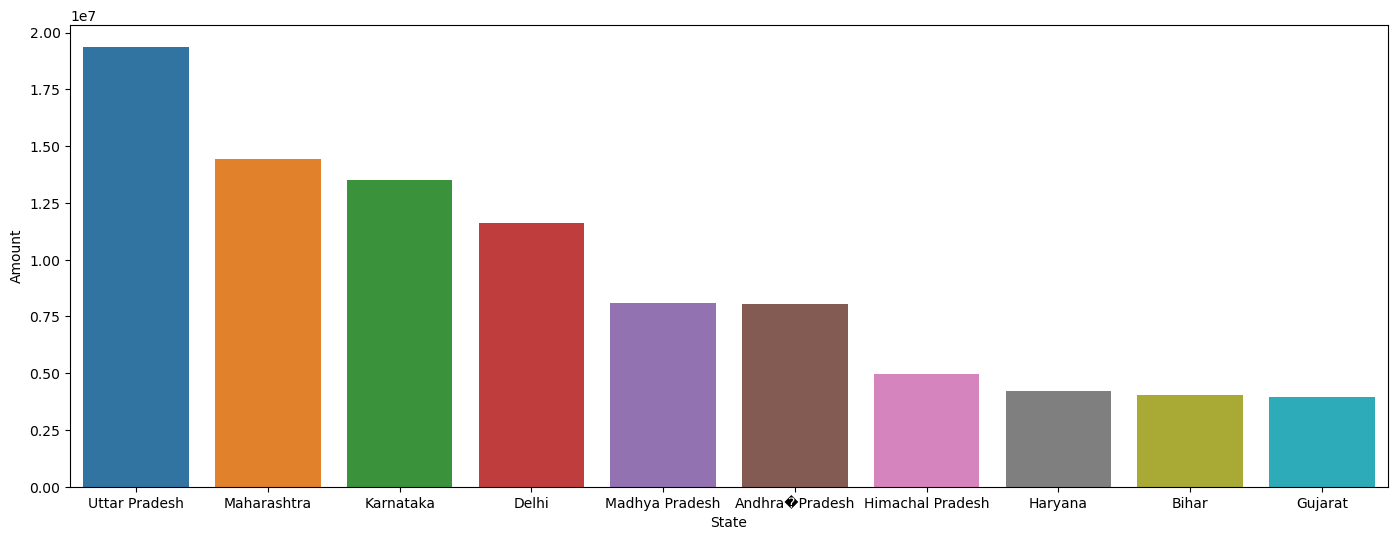

In [117]:
plt.figure(figsize = (17,6))

sns.barplot( data = sales_state , x = 'State', y = "Amount")

plt.show()

# Marital status

In [126]:
sales_state = df.groupby(["Marital_Status", "Gender"], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)
sales_state

,Marital_Status,Gender,Amount
0,0,F,43786648.44
2,1,F,30549207.99
1,0,M,18338738.00
3,1,M,13574538.00


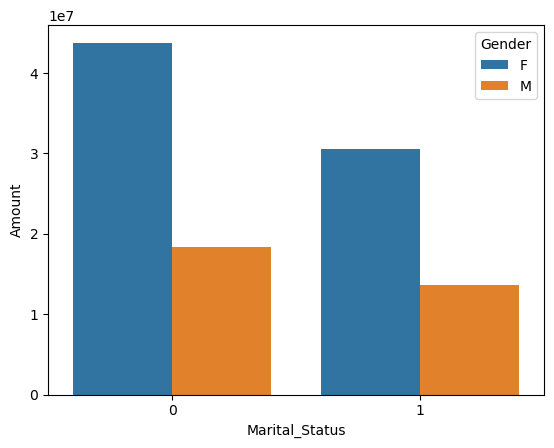

In [130]:
sns.barplot( data = sales_state , x = "Marital_Status" , y = 'Amount', hue = 'Gender')

plt.show()

# Occupation 

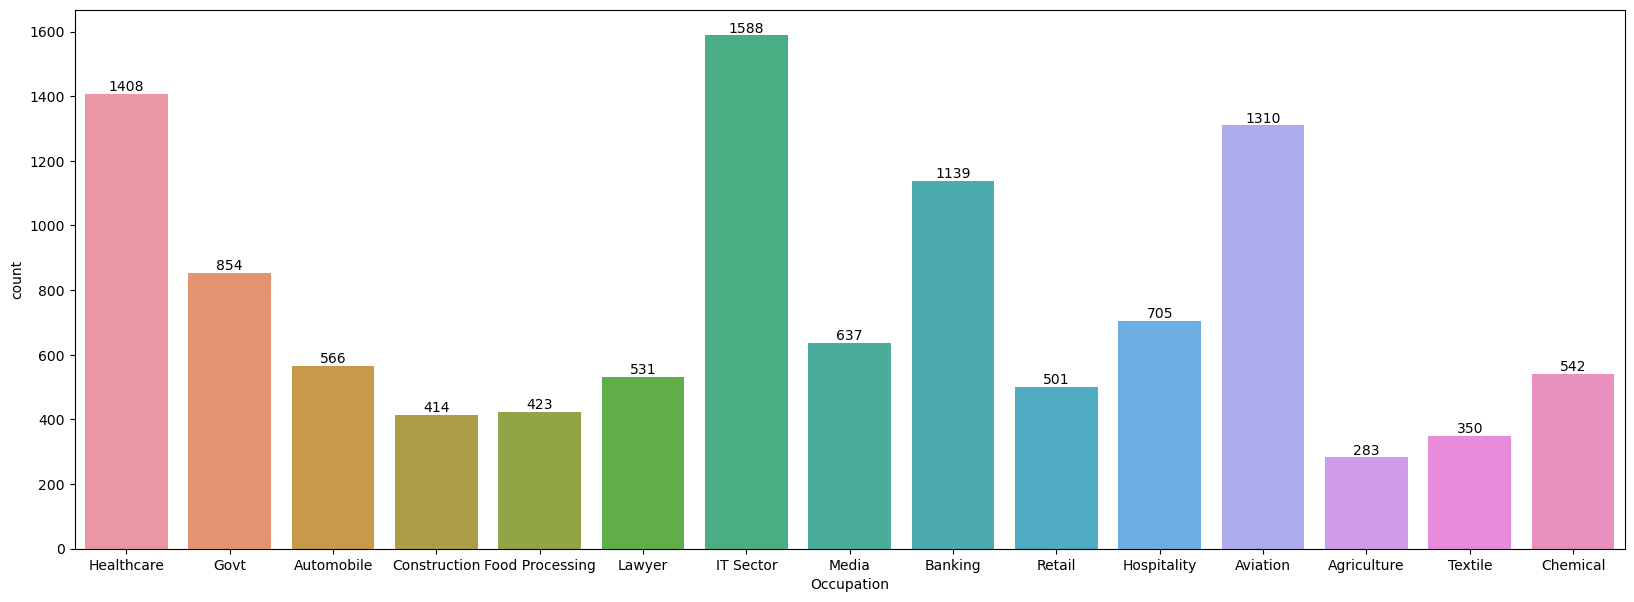

In [142]:
plt.figure(figsize = (20,7))

ax = sns.countplot( data = df , x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

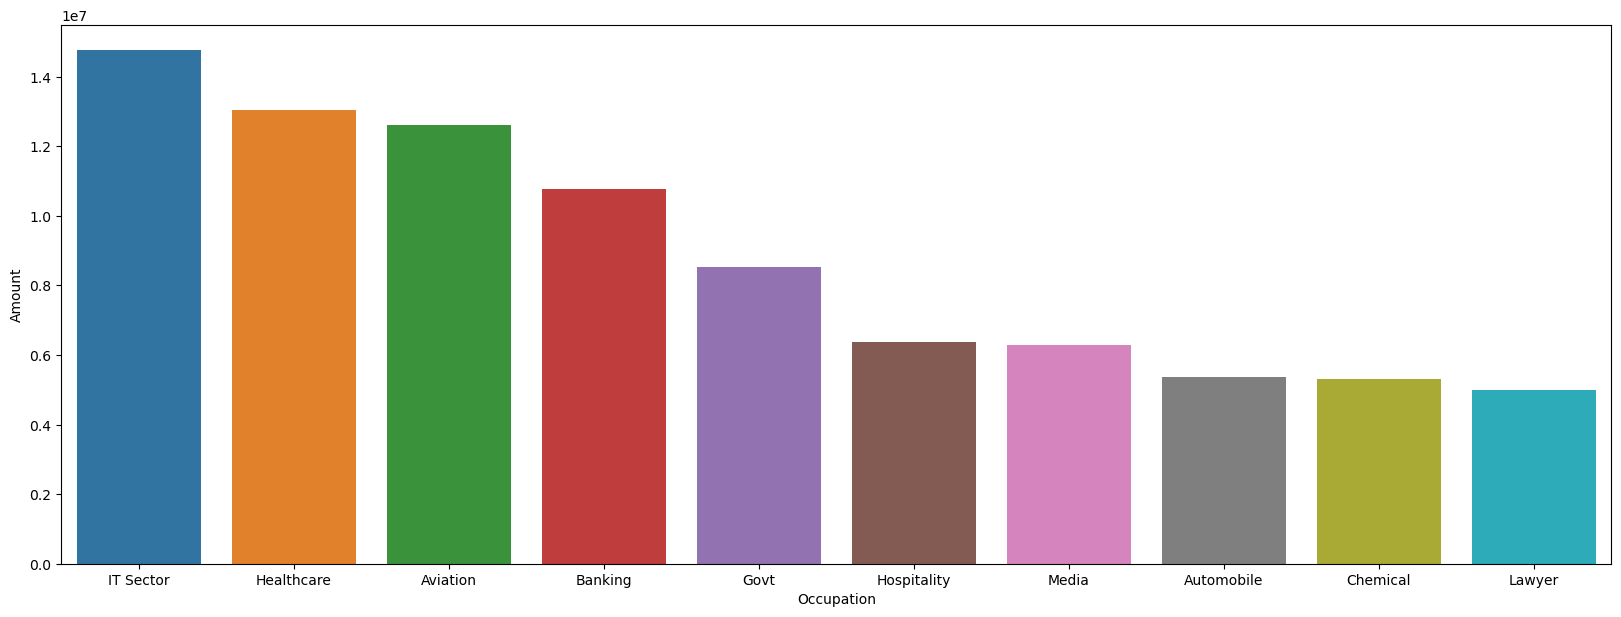

In [179]:
plt.figure(figsize = (20,7))

sales_state = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot( data = sales_state , x = "Occupation", y = "Amount")
plt.show()

# product Category 

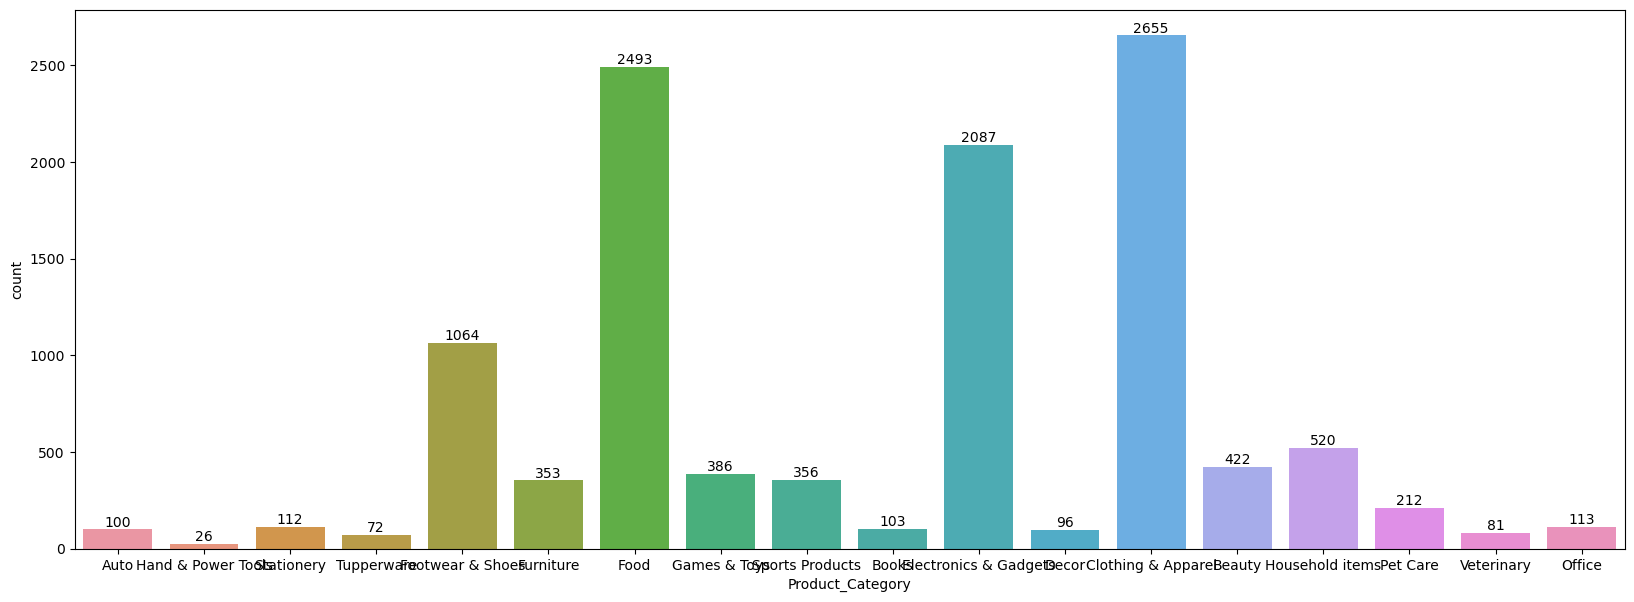

In [155]:
plt.figure(figsize = (20,7))

ax = sns.countplot( data = df , x = "Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

In [166]:
sales_state = df.groupby(["Product_ID"], as_index = False)["Orders"].sum().sort_values(by = 'Orders', ascending = False).head(10)

sales_state

,Product_ID,Orders
1680,P00265242,127
645,P00110942,116
1505,P00237542,91
1147,P00184942,82
680,P00114942,79
172,P00025442,79
889,P00145042,76
709,P00117942,76
299,P00044442,75
644,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

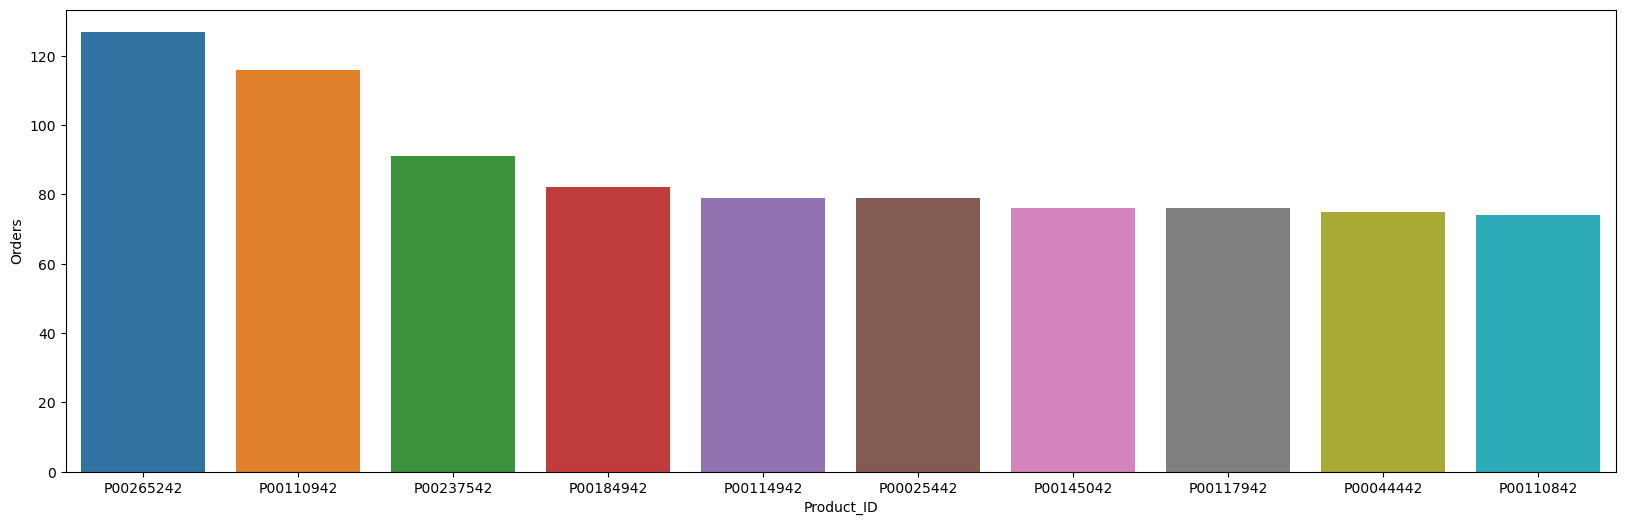

In [170]:
plt.figure(figsize = (20,6))

sns.barplot( data = sales_state , x = "Product_ID", y = "Orders")

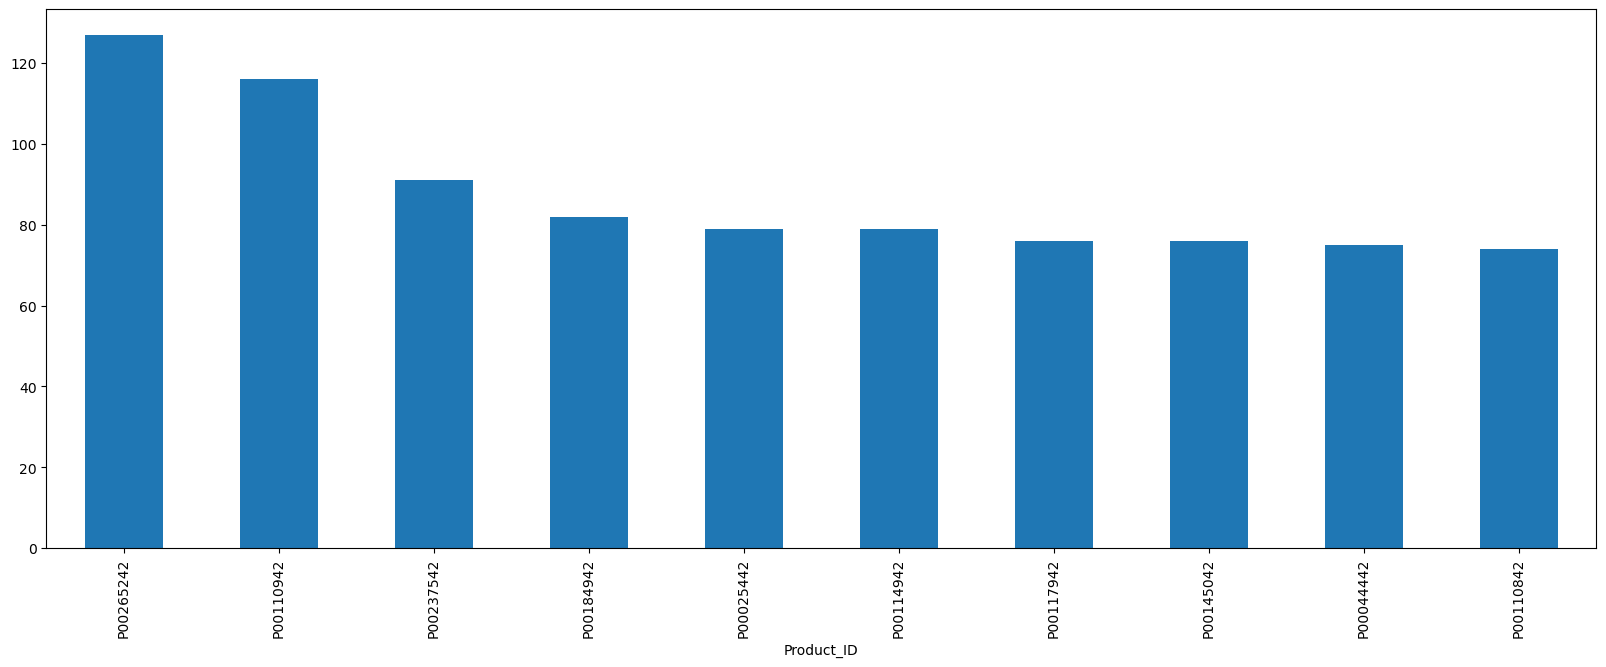

In [176]:
plt.figure(figsize = (20,7))
df.groupby("Product_ID")["Orders"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "bar")

plt.show()

# Conclusion